# Clean Reference USA
Read in reference USA data and select blocks along West 5th Street.

The Reference USA data provides a Business Inventory
    
    1. Read in Reference USA
    2. Check to make sure buisiness inventory has a unique id
    3. Add Census Block ID
    

## Description of Program
- program:    IN-CORE_1bv2_Lumberton_CleanReferenceUSA
- task:       Prepare Reference USA data for Labor Market Allocation
- Version:    2021-05-13
- project:    Interdependent Networked Community Resilience Modeling Environment (IN-CORE) Subtask 5.2 - Social Institutions
- funding:	  NIST Financial Assistance Award Numbers: 70NANB15H044 and 70NANB20H008 
- author:     Nathanael Rosenheim

- Suggested Citation:
Rosenheim, N. (2021) “Obtain, Clean, and Explore Labor Market Allocation Methods". 
Archived on Github and ICPSR.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import math as math
import numpy as np
import geopandas as gpd
import pandas as pd
import shapely
import descartes
import contextily as ctx # package for mapping shapefiles

import folium as fm # folium has more dynamic maps - but requires internet connection

import os # For saving output to path

In [2]:
# Display versions being used - important information for replication
import sys
print("Python Version     ", sys.version)
print("numpy version:     ", np.__version__)
print("geopandas version: ", gpd.__version__)
print("pandas version:    ", pd.__version__)
print("shapely version:   ", shapely.__version__)
# print("descartes version:   ", descartes.__version__)  1.1.0
print("folium version:    ", fm.__version__)

Python Version      3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:37:01) [MSC v.1916 64 bit (AMD64)]
numpy version:      1.20.2
geopandas version:  0.9.0
pandas version:     1.2.4
shapely version:    1.7.1
folium version:     0.12.1


In [3]:
# Store Program Name for output files to have the same name
programname = "IN-CORE_1bv2_Lumberton_CleanReferenceUSA_2021-05-13"
# Make directory to save output
if not os.path.exists(programname):
    os.mkdir(programname)

## Read in Reference USA Data
Reference USA provides a list of all businesses in a community.

In [4]:
filename = "..\SourceData\ReferenceUSA\Lumberton all 2016.csv"
refusa_df = pd.read_csv(filename)
refusa_df.head()

,Version Year,IUSA Number,Company Name,Executive First Name,Executive Last Name,Executive Title,Executive Gender,Address,City,State,...,Subsidiary IUSA Number,Latitude,Longitude,Firm or Individual,Record Type,Corporate Employee Size Actual,Corporate Sales Volume Actual,Years In Database,Year Established,Home Business
0,2016,70-869-1014,Bluewave,NaN,NaN,NaN,NaN,301 Bailey Rd,Lumberton,NC,...,0,34.658815,-79.007328,2,Verified,0,$0,3,NaN,No
1,2016,41-147-4682,"Britt, Evander M",Evander M,Britt,NaN,Male,1805 N Elm St,Lumberton,NC,...,0,34.630325,-79.008690,1,Verified,0,$0,7,NaN,Yes
2,2016,42-516-9180,Bryant's Willie,NaN,NaN,NaN,NaN,400 N Martin Luther King Jr Dr,Lumberton,NC,...,0,34.617695,-79.015588,2,Verified,0,$0,6,NaN,No
3,2016,71-122-6414,Carig Hartman,NaN,NaN,NaN,NaN,1173 Kenric Rd,Lumberton,NC,...,0,34.610195,-79.087891,2,Verified,0,$0,3,NaN,No
4,2016,71-812-0078,Cheer Xcel All Stars,NaN,NaN,NaN,NaN,1300 Linkhaw Rd,Lumberton,NC,...,0,34.643772,-78.983589,2,Verified,0,$0,3,NaN,No


In [5]:
# Use shapely.wkt loads to convert WKT to GeoSeries
from shapely.geometry import Point
# Geodata frame requires geometry and CRS to be set
points_gdf = gpd.GeoDataFrame(
    refusa_df,
    crs={'init': 'epsg:4326'},
    geometry=[Point(xy) for xy in zip(refusa_df['Longitude'], refusa_df['Latitude'])])

points_gdf.head(6)

C:\Users\nathanael99\Miniconda3\envs\pyincoreEnv20210506\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Version Year,IUSA Number,Company Name,Executive First Name,Executive Last Name,Executive Title,Executive Gender,Address,City,State,...,Latitude,Longitude,Firm or Individual,Record Type,Corporate Employee Size Actual,Corporate Sales Volume Actual,Years In Database,Year Established,Home Business,geometry
0,2016,70-869-1014,Bluewave,NaN,NaN,NaN,NaN,301 Bailey Rd,Lumberton,NC,...,34.658815,-79.007328,2,Verified,0,$0,3,NaN,No,POINT (-79.00733 34.65881)
1,2016,41-147-4682,"Britt, Evander M",Evander M,Britt,NaN,Male,1805 N Elm St,Lumberton,NC,...,34.630325,-79.008690,1,Verified,0,$0,7,NaN,Yes,POINT (-79.00869 34.63032)
2,2016,42-516-9180,Bryant's Willie,NaN,NaN,NaN,NaN,400 N Martin Luther King Jr Dr,Lumberton,NC,...,34.617695,-79.015588,2,Verified,0,$0,6,NaN,No,POINT (-79.01559 34.61769)
3,2016,71-122-6414,Carig Hartman,NaN,NaN,NaN,NaN,1173 Kenric Rd,Lumberton,NC,...,34.610195,-79.087891,2,Verified,0,$0,3,NaN,No,POINT (-79.08789 34.61019)
4,2016,71-812-0078,Cheer Xcel All Stars,NaN,NaN,NaN,NaN,1300 Linkhaw Rd,Lumberton,NC,...,34.643772,-78.983589,2,Verified,0,$0,3,NaN,No,POINT (-78.98359 34.64377)
5,2016,64-273-0212,Chempack,NaN,NaN,NaN,NaN,300 W 27th St,Lumberton,NC,...,34.637211,-79.011506,2,Verified,0,$0,11,NaN,No,POINT (-79.01151 34.63721)


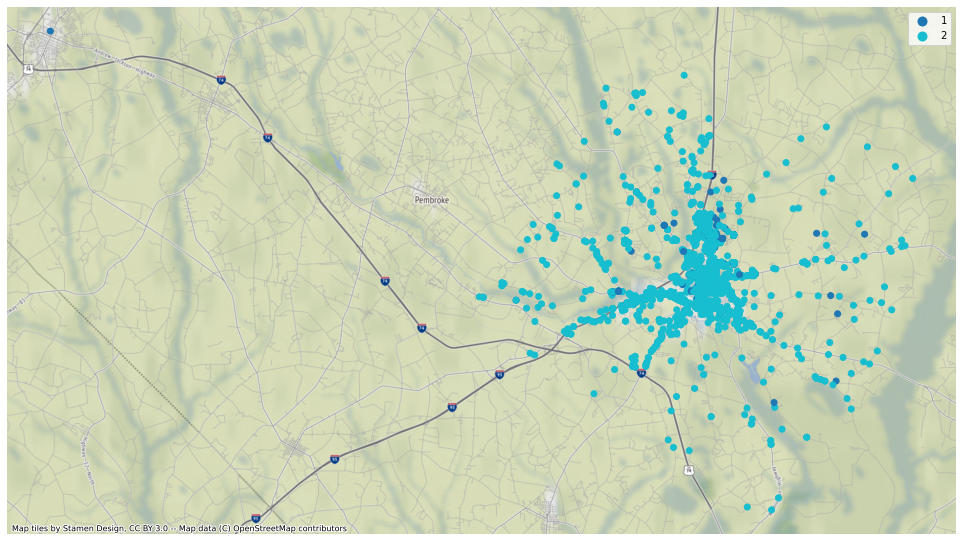

In [6]:
fig, ax = plt.subplots(figsize=(17, 15))
points_gdf_3857 = points_gdf.to_crs(epsg=3857)
points_gdf_3857.plot(column='Firm or Individual', categorical=True, legend=True, ax=ax)
ctx.add_basemap(ax)
ax.set_axis_off()

plt.show()

## Check Unique Business ID
Business ID will be important for linking Address Point Inventory to Buildings and Critical Infrastructure Inventories to Buildings.

ID must be unique and non-missing.

In [7]:
# Count the number of Unique Values
points_gdf['IUSA Number'].describe()

count            2547
unique           2547
top       88-302-1735
freq                1
Name: IUSA Number, dtype: object

In [8]:
# Count the number of Unique Values
points_gdf['IUSA Number'].nunique()

2547

In [9]:
# Are there any missing values for the unique id?
points_gdf.loc[points_gdf['IUSA Number'].isnull()]

,Version Year,IUSA Number,Company Name,Executive First Name,Executive Last Name,Executive Title,Executive Gender,Address,City,State,...,Latitude,Longitude,Firm or Individual,Record Type,Corporate Employee Size Actual,Corporate Sales Volume Actual,Years In Database,Year Established,Home Business,geometry


## Look at counts of Employment by 2 digit NAICS Code

In [10]:
points_gdf['Primary NAICS'].describe()

count      2547.000000
mean     597031.374951
std      171020.184611
min      111150.000000
25%      502115.000000
50%      621111.000000
75%      721110.000000
max      999990.000000
Name: Primary NAICS, dtype: float64

In [11]:
points_gdf['NAICS2D'] = points_gdf['Primary NAICS'].apply(lambda x : str(int(x))[0:2])

In [12]:
points_gdf['NAICS2D'].describe()

count     2547
unique      23
top         62
freq       650
Name: NAICS2D, dtype: object

In [13]:
points_gdf.groupby('NAICS2D').aggregate({'Location Employee Size Actual':np.sum})

,Location Employee Size Actual
NAICS2D,
11,70
22,36
23,1204
31,995
32,998
33,1140
42,588
44,2441
45,1206


## Read in Census Block Data
Census Blocks provide an estimate of how many residiential address points (housing units) should be located in each block.

In [15]:
source_program = 'IN-CORE_1av2_Lumberton_CleanBlockData_2021-06-02'
census_blocks_csv = source_program+"/"+source_program+"EPSG4269.csv"
census_blocks_df = pd.read_csv(census_blocks_csv)
census_blocks_gdf = gpd.GeoDataFrame(census_blocks_df)
census_blocks_gdf.head()

,Unnamed: 0,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE,BLOCKID10,PARTFLG,HOUSING10,POP10,geometry,...,blockid,tothupoints,popcount,HU100,POP100,popdiff,PLCGEOID10,PLCNAME10,PUMGEOID10,PUMNAME10
0,0,37,155,961900,2028,371559619002028,N,14,52,"POLYGON ((-79.22246 34.458838, -79.222528 34.4...",...,371559619002028,14,51,14,52,1,NaN,NaN,3705100,Robeson County (West)--Lumberton City PUMA
1,1,37,155,961900,2054,371559619002054,N,1,3,"POLYGON ((-79.179851 34.40192, -79.180036 34.4...",...,371559619002054,1,3,1,3,0,NaN,NaN,3705100,Robeson County (West)--Lumberton City PUMA
2,2,37,155,961700,2069,371559617002069,N,41,99,"POLYGON ((-79.172814 34.480917, -79.172749 34....",...,371559617002069,41,99,41,99,0,NaN,NaN,3705100,Robeson County (West)--Lumberton City PUMA
3,3,37,155,961700,2065,371559617002065,N,6,22,"POLYGON ((-79.15764299999999 34.503279, -79.15...",...,371559617002065,6,21,6,22,1,NaN,NaN,3705100,Robeson County (West)--Lumberton City PUMA
4,4,37,155,961700,2058,371559617002058,N,19,55,"POLYGON ((-79.15830299999999 34.497355, -79.15...",...,371559617002058,19,55,19,55,0,NaN,NaN,3705100,Robeson County (West)--Lumberton City PUMA


In [16]:
census_blocks_gdf.columns

Index(['Unnamed: 0', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLOCKCE',
       'BLOCKID10', 'PARTFLG', 'HOUSING10', 'POP10', 'geometry',
       'CountySelect', 'rppnt4269', 'blk104269', 'blockid', 'tothupoints',
       'popcount', 'HU100', 'POP100', 'popdiff', 'PLCGEOID10', 'PLCNAME10',
       'PUMGEOID10', 'PUMNAME10'],
      dtype='object')

In [17]:
# Use shapely.wkt loads to convert WKT to GeoSeries
from shapely.wkt import loads

census_blocks_gdf['geometry'] = census_blocks_gdf['geometry'].apply(lambda x: loads(x))
census_blocks_gdf['geometry'].geom_type.describe()

count        5799
unique          1
top       Polygon
freq         5799
dtype: object

In [18]:
census_blocks_gdf = census_blocks_gdf.set_geometry(census_blocks_gdf['geometry'])
census_blocks_gdf.crs = {'init':'epsg:4269'}
census_blocks_gdf.head()

C:\Users\nathanael99\Miniconda3\envs\pyincoreEnv20210506\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Unnamed: 0,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE,BLOCKID10,PARTFLG,HOUSING10,POP10,geometry,...,blockid,tothupoints,popcount,HU100,POP100,popdiff,PLCGEOID10,PLCNAME10,PUMGEOID10,PUMNAME10
0,0,37,155,961900,2028,371559619002028,N,14,52,"POLYGON ((-79.22246 34.45884, -79.22253 34.458...",...,371559619002028,14,51,14,52,1,NaN,NaN,3705100,Robeson County (West)--Lumberton City PUMA
1,1,37,155,961900,2054,371559619002054,N,1,3,"POLYGON ((-79.17985 34.40192, -79.18004 34.401...",...,371559619002054,1,3,1,3,0,NaN,NaN,3705100,Robeson County (West)--Lumberton City PUMA
2,2,37,155,961700,2069,371559617002069,N,41,99,"POLYGON ((-79.17281 34.48092, -79.17275 34.480...",...,371559617002069,41,99,41,99,0,NaN,NaN,3705100,Robeson County (West)--Lumberton City PUMA
3,3,37,155,961700,2065,371559617002065,N,6,22,"POLYGON ((-79.15764 34.50328, -79.15784 34.502...",...,371559617002065,6,21,6,22,1,NaN,NaN,3705100,Robeson County (West)--Lumberton City PUMA
4,4,37,155,961700,2058,371559617002058,N,19,55,"POLYGON ((-79.15830 34.49735, -79.15664 34.498...",...,371559617002058,19,55,19,55,0,NaN,NaN,3705100,Robeson County (West)--Lumberton City PUMA


In [19]:
# Check CRS for Building Centroid and Block
census_blocks_gdf.crs

<Geographic 2D CRS: +init=epsg:4269 +type=crs>
Name: NAD83
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Islands.

In [20]:
points_gdf.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
# Convert Census Block CRS to Point CRS
census_blocks_gdf = census_blocks_gdf.to_crs(points_gdf.crs)
census_blocks_gdf.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
# Check change in Geometry
census_blocks_gdf['blk104269'] = census_blocks_gdf['blk104269'].apply(lambda x: loads(x))
census_blocks_gdf[['geometry','blk104269']].loc[census_blocks_gdf['geometry'] != census_blocks_gdf['blk104269']]

,geometry,blk104269
0,"POLYGON ((-79.22246 34.45884, -79.22253 34.458...","POLYGON ((-79.22246 34.458838, -79.222528 34.4..."
1,"POLYGON ((-79.17985 34.40192, -79.18003 34.401...","POLYGON ((-79.179851 34.40192, -79.180036 34.4..."
2,"POLYGON ((-79.17281 34.48091, -79.17275 34.480...","POLYGON ((-79.172814 34.480917, -79.172749 34...."
3,"POLYGON ((-79.15764 34.50328, -79.15783 34.502...","POLYGON ((-79.15764299999999 34.503279, -79.15..."
4,"POLYGON ((-79.15830 34.49735, -79.15664 34.498...","POLYGON ((-79.15830299999999 34.497355, -79.15..."
...,...,...
5794,"POLYGON ((-79.14877 34.68345, -79.14895 34.683...","POLYGON ((-79.148774 34.683457, -79.14895 34.6..."
5795,"POLYGON ((-78.96457 34.63881, -78.96383 34.638...","POLYGON ((-78.96456999999999 34.638815, -78.96..."
5796,"POLYGON ((-79.18734 34.57771, -79.18651 34.578...","POLYGON ((-79.18734099999999 34.577712, -79.18..."
5797,"POLYGON ((-79.05617 34.49265, -79.06709 34.496...","POLYGON ((-79.056175 34.49265, -79.067093 34.4..."


In [23]:
census_blocks_gdf[['geometry','blk104269']].head()

,geometry,blk104269
0,"POLYGON ((-79.22246 34.45884, -79.22253 34.458...","POLYGON ((-79.22246 34.458838, -79.222528 34.4..."
1,"POLYGON ((-79.17985 34.40192, -79.18003 34.401...","POLYGON ((-79.179851 34.40192, -79.180036 34.4..."
2,"POLYGON ((-79.17281 34.48091, -79.17275 34.480...","POLYGON ((-79.172814 34.480917, -79.172749 34...."
3,"POLYGON ((-79.15764 34.50328, -79.15783 34.502...","POLYGON ((-79.15764299999999 34.503279, -79.15..."
4,"POLYGON ((-79.15830 34.49735, -79.15664 34.498...","POLYGON ((-79.15830299999999 34.497355, -79.15..."


In [24]:
census_blocks_gdf.geometry.name

'geometry'

### Need to explore projection issues
It looks like NAD 83 (EPSG 4326) and WGS 84 (EPSG 4269) Produce the same lat lan coordinates. I was expecting there to be slight differences.

In [25]:
# Convert BLOCKID10 to a string
census_blocks_gdf['BLOCKID10'] = census_blocks_gdf['BLOCKID10'].apply(lambda x : str(int(x)))

## Add State, County, and Census Block ID to Each Point

## Select Blocks within Bounding Box of Buildings

In [26]:
census_blocks_gdf['BLOCKID10'].describe()

count                5799
unique               5799
top       371559603003008
freq                    1
Name: BLOCKID10, dtype: object

In [27]:
# Find the bounds of the points to select Census Blocks
# Add Small Buffer for blocks on the edges
buffer = 0.001
minx = points_gdf.bounds.minx.min() - buffer # subtract buffer from minimum values
miny = points_gdf.bounds.miny.min() - buffer # subtract buffer from minimum values
maxx = points_gdf.bounds.maxx.max() + buffer
maxy = points_gdf.bounds.maxy.max() + buffer
points_gdf_bounds = [minx, miny, maxx, maxy]
points_gdf_bounds

[-79.464045, 34.499797, -78.856628, 34.778366999999996]

In [28]:
# Select pumas within Bounds of Study Area
# build the r-tree index - for census blocks
sindex_census_blocks_gdf = census_blocks_gdf.sindex
possible_matches_index = list(sindex_census_blocks_gdf.intersection(points_gdf_bounds))
points_census_blocks_gdf = census_blocks_gdf.iloc[possible_matches_index]
points_census_blocks_gdf['BLOCKID10'].describe()

count                4030
unique               4030
top       371559611002025
freq                    1
Name: BLOCKID10, dtype: object

## Add Census Geogrpahy Details to Buildings

In [29]:
# Significant help from: https://geoffboeing.com/2016/10/r-tree-spatial-index-python/
# Significant help from: https://github.com/gboeing/urban-data-science/blob/master/19-Spatial-Analysis-and-Cartography/rtree-spatial-indexing.ipynb
# build the r-tree index - Using Representative Point
sindex_points_gdf = points_gdf.sindex
sindex_points_gdf

rtree.index.Index(bounds=[-79.463045, 34.500797, -78.857628, 34.777367], size=2547)

In [30]:
# find the points that intersect with each subpolygon and add ID to Point
for index, block in points_census_blocks_gdf.iterrows():
    if index%100==0:
        print('.', end ="")

    # find approximate matches with r-tree, then precise matches from those approximate ones
    possible_matches_index = list(sindex_points_gdf.intersection(block['geometry'].bounds))
    possible_matches = points_gdf.iloc[possible_matches_index]
    precise_matches = possible_matches[possible_matches.intersects(block['geometry'])]
    points_gdf.loc[precise_matches.index,'BLOCKID10'] = block['BLOCKID10']
    points_gdf.loc[precise_matches.index,'STATEFP10'] = block['STATEFP10']
    points_gdf.loc[precise_matches.index,'COUNTYFP10'] = block['COUNTYFP10']
    points_gdf.loc[precise_matches.index,'TRACTCE10'] = block['TRACTCE10']
    points_gdf.loc[precise_matches.index,'PUMGEOID10'] = block['PUMGEOID10']
    points_gdf.loc[precise_matches.index,'PUMNAME10'] = block['PUMNAME10']
    points_gdf.loc[precise_matches.index,'PLCGEOID10'] = block['PLCGEOID10']
    points_gdf.loc[precise_matches.index,'PLCNAME10'] = block['PLCNAME10']

.........................................

In [31]:
# Move Foriegn Key Columns Block ID State, County, Tract to first Columns
first_columns = ['IUSA Number','BLOCKID10','STATEFP10','COUNTYFP10','TRACTCE10','PUMGEOID10','PUMNAME10','PLCGEOID10','PLCNAME10']
cols = first_columns + [col for col in points_gdf if col not in first_columns]
points_gdf = points_gdf[cols]
points_gdf.head()

,IUSA Number,BLOCKID10,STATEFP10,COUNTYFP10,TRACTCE10,PUMGEOID10,PUMNAME10,PLCGEOID10,PLCNAME10,Version Year,...,Longitude,Firm or Individual,Record Type,Corporate Employee Size Actual,Corporate Sales Volume Actual,Years In Database,Year Established,Home Business,geometry,NAICS2D
0,70-869-1014,371559613011129,37.0,155.0,961301.0,3705100.0,Robeson County (West)--Lumberton City PUMA,3739700.0,Lumberton,2016,...,-79.007328,2,Verified,0,$0,3,NaN,No,POINT (-79.00733 34.65881),99
1,41-147-4682,371559609002052,37.0,155.0,960900.0,3705100.0,Robeson County (West)--Lumberton City PUMA,3739700.0,Lumberton,2016,...,-79.008690,1,Verified,0,$0,7,NaN,Yes,POINT (-79.00869 34.63032),99
2,42-516-9180,371559608014000,37.0,155.0,960801.0,3705100.0,Robeson County (West)--Lumberton City PUMA,3739700.0,Lumberton,2016,...,-79.015588,2,Verified,0,$0,6,NaN,No,POINT (-79.01559 34.61769),99
3,71-122-6414,371559608012111,37.0,155.0,960801.0,3705100.0,Robeson County (West)--Lumberton City PUMA,NaN,NaN,2016,...,-79.087891,2,Verified,0,$0,3,NaN,No,POINT (-79.08789 34.61019),99
4,71-812-0078,371559613022019,37.0,155.0,961302.0,3705100.0,Robeson County (West)--Lumberton City PUMA,3739700.0,Lumberton,2016,...,-78.983589,2,Verified,0,$0,3,NaN,No,POINT (-78.98359 34.64377),99


### How many points do not have block id information?

In [32]:
points_noblock_gdf = points_gdf.loc[(points_gdf['BLOCKID10'].isnull())]
points_noblock_gdf

,IUSA Number,BLOCKID10,STATEFP10,COUNTYFP10,TRACTCE10,PUMGEOID10,PUMNAME10,PLCGEOID10,PLCNAME10,Version Year,...,Longitude,Firm or Individual,Record Type,Corporate Employee Size Actual,Corporate Sales Volume Actual,Years In Database,Year Established,Home Business,geometry,NAICS2D
930,71-170-6370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,...,-79.463045,1,Verified,0,$0,3,NaN,No,POINT (-79.46304 34.77737),62


In [33]:
# if there are missing buildings this code will help identify where they are - every building should have a block
# plot the building with missing block data
# Find the bounds of the Census Block File
minx = points_gdf.bounds.minx.min()
miny = points_gdf.bounds.miny.min()
maxx = points_gdf.bounds.maxx.max()
maxy = points_gdf.bounds.maxy.max()

blockstyle_function = lambda x: {'color':'green','fillColor': 'transparent' }

points_gdf_map = fm.Map(location=[(miny+maxy)/2,(minx+maxx)/2], zoom_start=10)
fm.GeoJson(points_noblock_gdf).add_to(points_gdf_map)
fm.GeoJson(census_blocks_gdf['geometry'],name='All Census Blocks',style_function=blockstyle_function).add_to(points_gdf_map)
fm.GeoJson(points_census_blocks_gdf['geometry'],name='Selected Census Blocks').add_to(points_gdf_map)
points_gdf_map.save(programname+'points_noblocks.html')

## Select Study Area Businesses

In [34]:
# Find the bounds of the Census Block File
minx = points_gdf.bounds.minx.min()
miny = points_gdf.bounds.miny.min()
maxx = points_gdf.bounds.maxx.max()
maxy = points_gdf.bounds.maxy.max()

blockstyle_function = lambda x: {'color':'green','fillColor': 'transparent' }

points_gdf_map = fm.Map(location=[(miny+maxy)/2,(minx+maxx)/2], zoom_start=10)
fm.GeoJson(points_gdf).add_to(points_gdf_map)
fm.GeoJson(points_census_blocks_gdf[['geometry','BLOCKID10']],name='Selected Census Blocks',
           style_function=blockstyle_function,
           tooltip=fm.features.GeoJsonTooltip(fields=['BLOCKID10'], sticky=False)).add_to(points_gdf_map)
points_gdf_map.save(programname+'points_findblocks.html')

### Save Work

In [35]:
# Check Columns
cols = [col for col in points_gdf]
cols

['IUSA Number',
 'BLOCKID10',
 'STATEFP10',
 'COUNTYFP10',
 'TRACTCE10',
 'PUMGEOID10',
 'PUMNAME10',
 'PLCGEOID10',
 'PLCNAME10',
 'Version Year',
 'Company Name',
 'Executive First Name',
 'Executive Last Name',
 'Executive Title',
 'Executive Gender',
 'Address',
 'City',
 'State',
 'ZIP Code',
 'ZIP Four',
 'County',
 'Phone Number Combined',
 'Primary SIC Code',
 'Primary SIC Description',
 'SIC Code 1',
 'Unnamed: 17',
 'SIC Code 1 Description',
 'SIC Code 1 Ad Size',
 'SIC Code 1 Year Appeared',
 'SIC Code 2',
 'SIC Code 2 Description',
 'SIC Code 3',
 'SIC Code 3 Description',
 'SIC Code 4',
 'SIC Code 4 Description',
 'SIC Code 5',
 'SIC Code 5 Description',
 'SIC Code 6',
 'SIC Code 6 Description',
 'SIC Code 7',
 'SIC Code 7 Description',
 'SIC Code 8',
 'SIC Code 8 Description',
 'SIC Code 9',
 'SIC Code 9 Description',
 'SIC Code 10',
 'SIC Code 10 Description',
 'Primary NAICS',
 'Primary NAICS Description',
 'NAICS 1',
 'NAICS 1 Description',
 'NAICS 2',
 'NAICS 2 Descri

In [36]:
# Save Work at this point as CSV
savefile = sys.path[0]+"/"+programname+"/"+programname+"_EPSG4326.csv"
points_gdf.to_csv(savefile)

## Look at Selected Blocks

In [37]:
blocklist = ['371559608012061',
'371559608012062',
'371559608012022',
'371559608012019',
'371559608012020',
'371559608012021',
'371559608012059',
'371559608012060',
'371559608012058',
'371559608012071',
'371559608012057'
]

In [38]:
studyarea_gdf = points_gdf.loc[points_gdf['BLOCKID10'].isin(blocklist)]

In [39]:
studyarea_gdf.groupby('NAICS2D').aggregate({'Location Employee Size Actual':np.sum})

,Location Employee Size Actual
NAICS2D,
23,2
44,163
45,16
48,2
52,41
53,6
54,8
62,81
72,232


In [40]:
# Save Work at this point as CSV
savefile = sys.path[0]+"/"+programname+"/"+programname+"_studyarea.csv"
studyarea_gdf.to_csv(savefile)

In [41]:
studyarea_gdf.groupby('BLOCKID10').aggregate({'Location Employee Size Actual':np.sum})

,Location Employee Size Actual
BLOCKID10,
371559608012019,8
371559608012020,11
371559608012021,4
371559608012022,20
371559608012057,47
371559608012058,112
371559608012059,18
371559608012061,235
371559608012062,67


In [42]:
studyarea_gdf.groupby(['BLOCKID10','Location Type']).aggregate({'Location Employee Size Actual':np.sum})

Location Employee Size Actual
BLOCKID10       Location Type                               
371559608012019 Single Loc                                 8
371559608012020 Single Loc                                11
371559608012021 Single Loc                                 4
371559608012022 Branch                                     3
                Single Loc                                17
371559608012057 Branch                                    27
                Single Loc                                20
371559608012058 Branch                                   112
371559608012059 Branch                                     8
                Single Loc                                10
371559608012061 Branch                                   137
                Single Loc                                98
371559608012062 Branch                                    65
                Single Loc                                 2
371559608012071 Branch                                    40
                Single Loc                                 6